<a href="https://colab.research.google.com/github/enels/pharma_sales/blob/main/pharma_sales_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Sun Nov  1 17:21:04 2020

@author: ASUS
"""
# Importing necessary libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import warnings
import io

warnings.filterwarnings("ignore")

# Importing Dataset,

# comment both lines if to be run on local machine
#from google.colab import files
#uploaded = files.upload()

# comment if to be run on colab (optional)
#data = pd.read_csv(io.BytesIO(uploaded['salesweekly.csv']))

# uncomment if to be run on local machine
data = pd.read_csv('salesweekly.csv')

a1 = data.head();             # The first few rows
print(a1)                   # To visualise dataset
#date_time = pd.to_datetime(data.pop('datum'), format='%Y/%m/%d') # removes the date column
date_time = pd.to_datetime(data.pop('datum'), format='%m/%d/%Y') # removes the date column
print("=====================================")
print(data.head())                # visualise the new dataset

       datum  M01AB  M01AE  N02BA   N02BE  N05B  N05C   R03   R06
0   1/5/2014  14.00  11.67   21.3  185.95  41.0   0.0  32.0   7.0
1  1/12/2014  29.33  12.68   37.9  190.70  88.0   5.0  21.0   7.2
2  1/19/2014  30.67  26.34   45.9  218.40  80.0   8.0  29.0  12.0
3  1/26/2014  34.00  32.37   31.5  179.60  80.0   8.0  23.0  10.0
4   2/2/2014  31.02  23.35   20.7  159.88  84.0  12.0  29.0  12.0
   M01AB  M01AE  N02BA   N02BE  N05B  N05C   R03   R06
0  14.00  11.67   21.3  185.95  41.0   0.0  32.0   7.0
1  29.33  12.68   37.9  190.70  88.0   5.0  21.0   7.2
2  30.67  26.34   45.9  218.40  80.0   8.0  29.0  12.0
3  34.00  32.37   31.5  179.60  80.0   8.0  23.0  10.0
4  31.02  23.35   20.7  159.88  84.0  12.0  29.0  12.0


In [4]:

sales_rate = np.zeros((len(data), ))
data['sales_rate'] = sales_rate

high_sales = 1.0
low_sales = 0.0

column_list = list(data)
for index, row in data.iterrows():
  total_sales = row.sum()
  if total_sales > 400:
    data.at[index, "sales_rate"] = high_sales

# drop the sales_rate column and make it the target data
targets = data.pop('sales_rate')
print(targets.head())
print('===================')
print(data.head())
column_list = list(data)

0    0.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: sales_rate, dtype: float64
   M01AB  M01AE  N02BA   N02BE  N05B  N05C   R03   R06
0  14.00  11.67   21.3  185.95  41.0   0.0  32.0   7.0
1  29.33  12.68   37.9  190.70  88.0   5.0  21.0   7.2
2  30.67  26.34   45.9  218.40  80.0   8.0  29.0  12.0
3  34.00  32.37   31.5  179.60  80.0   8.0  23.0  10.0
4  31.02  23.35   20.7  159.88  84.0  12.0  29.0  12.0


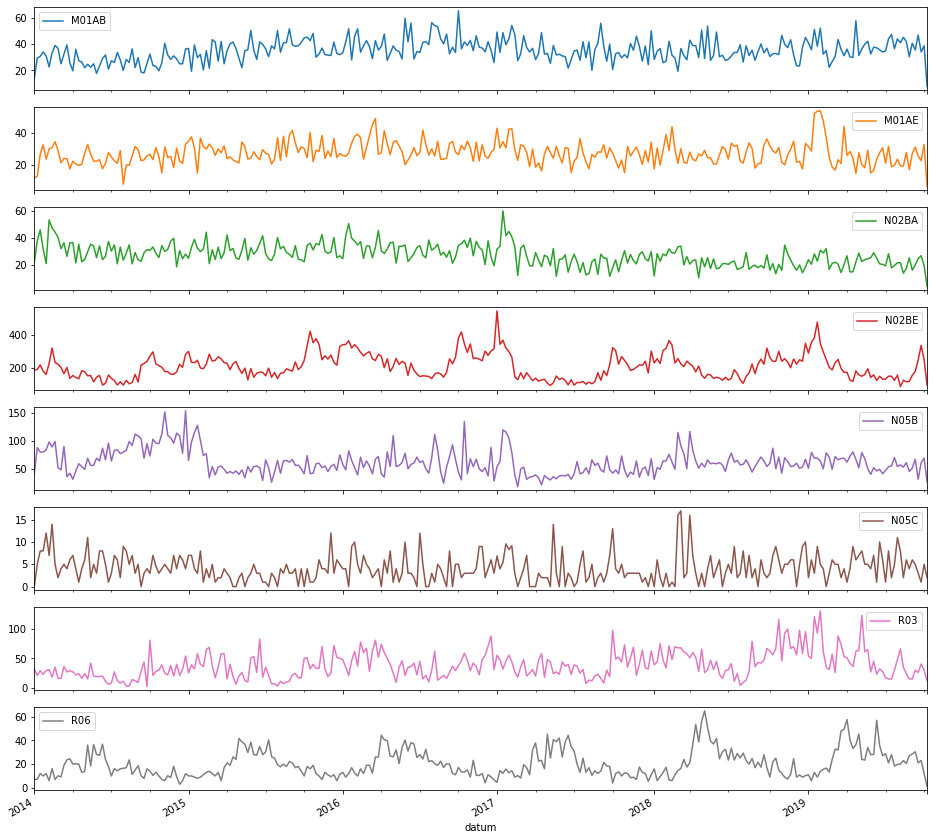

In [5]:
mpl.rcParams['figure.figsize'] = (16, 16)
plot_cols = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']
plot_features = data[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

# view each of the drug time on a graph
plt.show()

In [6]:
# Build Custom Functions to help

# get the z-score
def z_score (data, column_list):
  # Standardize features
  for field in column_list:
    # get the mean and standard deviations
    mean, std = data[field].mean(), data[field].std()
    
    # get the ...
    data.loc[:,field] = (data[field] - mean) / std
    
  ##data = ( data - data.mean() ) / data.std()
  
  return data

# for remove negative values from dataset
def remove_negation(data):
  for index, row in data.iterrows():
    if row['M01AB'] < 0:
      data.at[index, 'M01AB'] = -row['M01AB']
    if row['M01AE'] < 0:
      data.at[index, 'M01AE'] = -row['M01AE']
    if row['N02BA'] < 0:
      data.at[index, 'N02BA'] = -row['N02BA']
    if row['N02BE'] < 0:
      data.at[index, 'N02BE'] = -row['N02BE']
    if row['N05B'] < 0:
      data.at[index, 'N05B'] = -row['N05B']
    if row['N05C'] < 0:
      data.at[index, 'N05C'] = -row['N05C']
    if row['R03'] < 0:
      data.at[index, 'R03'] = -row['R03']
    if row['R06'] < 0:
      data.at[index, 'R06'] = -row['R06']
    
  return data

def divide_throug_by_5 (data):

  data = data / 5
  return data

# for squasing the values to lie between 0 and 1
#def squash_data (data):
def normalize(data, column_list):

  print("normalizing dataset...")

  data = z_score(data, column_list)
  #data = remove_negation(data)
  data = divide_throug_by_5(data)

  return data

In [7]:
# Normalize the data
data = normalize(data, column_list)
print(data.head())

normalizing dataset...
      M01AB     M01AE     N02BA     N02BE      N05B      N05C       R03  \
0 -0.489780 -0.440055 -0.142468 -0.059622 -0.184881 -0.264531 -0.056241   
1 -0.133976 -0.411376  0.268095 -0.047134  0.234070  0.055033 -0.152307   
2 -0.102875 -0.023500  0.465957  0.025695  0.162759  0.246771 -0.082441   
3 -0.025587  0.147722  0.109806 -0.076318  0.162759  0.246771 -0.134840   
4 -0.094752 -0.108401 -0.157307 -0.128165  0.198415  0.502423 -0.082441   

        R06  
0 -0.232388  
1 -0.228873  
2 -0.144526  
3 -0.179670  
4 -0.144526  


In [8]:
#column_indices = {name: i for i, name in enumerate(data.columns)}
n = len(data)
features = data.values
targets = targets.values
# Split for the features training, features validation, and features test sets in ratio of 70% , 20% and 10%
features_train = features[0:int(n*0.7)]             
features_val = features[int(n*0.7):int(n*0.9)]
features_test = features[int(n*0.9):]

# Also split the target training, target validation and target test sets in ration of 70%, 20% and 10%
targets_train = targets[0:int(n*0.7)]
targets_val = targets[int(n*0.7):int(n*0.9)]
targets_test = targets[int(n*0.9):]

In [ ]:
np.random.seed(42)

# define the activation function
def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))


# Hyperparameters
n_hidden = 3  # number of hidden units
epochs = 3000
learnrate = 0.00008
bias = 0.001

n_records, n_features = features.shape
last_loss = None

# Initialize weights
weights_input_hidden = np.random.normal(scale=1 / n_features ** .5,
                                        size=(n_features, n_hidden))
weights_hidden_1_hidden_2 = np.random.normal(scale=1 / n_features ** .5,
                                        size=(n_hidden, n_hidden))
weights_hidden_output = np.random.normal(scale=1 / n_features ** .5,
                                         size=n_hidden)

for e in range(epochs):
    del_w_input_hidden = np.zeros(weights_input_hidden.shape)
    del_w_hidden_output = np.zeros(weights_hidden_output.shape)
    del_w_hidden_1_2 = np.zeros(weights_hidden_1_hidden_2.shape)
    for x, y in zip(features_train, targets_train):
        ## Forward pass ##
        # Calculate the output
        hidden_1 = np.dot(x, weights_input_hidden) + bias
        hidden_1_output = sigmoid(hidden_1)
        hidden_2 = np.dot(hidden_1_output, weights_hidden_1_hidden_2) + bias
        hidden_2_output = sigmoid(hidden_2)

        output = sigmoid(np.dot(hidden_2_output,
                                weights_hidden_output))

        ## Backward pass ##
        # Calculate the network's prediction error
        error = y - output

        # Calculate error term for the output unit
        output_error_term = error * output * (1 - output)

        ## propagate errors back to the hidden one layer

        # Calculate the hidden layer's contribution to the error
        hidden_2_error = np.dot(output_error_term, weights_hidden_output)

        # Calculate the error term for the second hidden layer
        hidden_2_error_term = hidden_2_error * hidden_2_output * (1 - hidden_2_output)

        # Caculate the error for the first hidden layer
        hidden_1_error = np.dot(hidden_2_error_term, weights_hidden_1_hidden_2)

        # Calculate the error term for the first hidden layer
        hidden_1_error_term = hidden_1_error * hidden_1_output * (1 - hidden_1_output)

        # Update the change in weights
        del_w_hidden_output += output_error_term * hidden_2_output
        del_w_hidden_1_2 += hidden_2_error_term * hidden_1_output
        del_w_input_hidden += hidden_1_error_term * x[:, None]

    # Update weights
    weights_input_hidden += learnrate * del_w_input_hidden / n_records
    weights_hidden_1_hidden_2 += learnrate + del_w_hidden_1_2 / n_records
    weights_hidden_output += learnrate * del_w_hidden_output / n_records
    
    # Printing out the mean square error on the training set
    if e % (epochs / 10) == 0:
        print("Epoch: {0} / {1}".format(e, epochs))
        hidden_1_output = sigmoid(np.dot(x, weights_input_hidden) + bias)
        hidden_2_output = sigmoid(np.dot(hidden_1_output, weights_hidden_1_hidden_2) + bias)
        out = sigmoid(np.dot(hidden_2_output,
                             weights_hidden_output) + bias)
        loss = np.mean((out - targets) ** 2)

        if last_loss and last_loss < loss:
            print("Train loss: ", loss, "  WARNING - Loss Increasing")
        else:
            print("Train loss: ", loss)
        last_loss = loss
        print("=======================================")
 
    ## if validation data set is extracted along with the training and test sets
    if  e % (epochs / 10) == 0:
        hidden_1_output = sigmoid(np.dot(features_val, weights_input_hidden) + bias)
        hidden_2_output = sigmoid(np.dot(hidden_1_output, weights_hidden_1_hidden_2) + bias)
        out = sigmoid(np.dot(hidden_2_output,
                             weights_hidden_output) + bias)
        loss = np.mean((out - targets_val))
        
        if last_loss and last_loss < loss:
            print("Validation Loss: ", loss, " WARNING - Loss Increasing")

# Calculate accuracy on test data
hidden_1 = sigmoid(np.dot(features_test, weights_input_hidden) + bias)
hidden_2 = sigmoid(np.dot(hidden_1, weights_hidden_1_hidden_2) + bias)
out = sigmoid(np.dot(hidden_2, weights_hidden_output) + bias)
predictions = out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Epoch: 0 / 3000
Train loss:  0.2555558891600352
Epoch: 300 / 3000
Train loss:  0.25350744580044826


In [ ]:
date_time = date_time[:31,]
fig, ax = plt.subplots()
ax.plot(date_time, out)

ax.set(xlabel='date', ylabel='sales',
       title='Weekly sales rate')
ax.grid()

fig.savefig("sales_graph.png")
plt.show()